In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [10]:
# Load the dataset

df = pd.read_csv("C:/Users/edass/Downloads/Employee.csv")
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [11]:
# Display basic info
display(df.head())
display(df.info())

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


None

In [12]:
# Renaming columns (Modify as needed)

df.rename(columns={
    "Company": "company",
    "Age": "age",
    "Salary": "salary",
    "Place": "place",
    "Country": "country",
    "Gender": "gender"
}, inplace=True)

df

,company,age,salary,place,country,gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [13]:
# Unique values in each column
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

company: 6 unique values
age: 29 unique values
salary: 40 unique values
place: 11 unique values
country: 1 unique values
gender: 2 unique values


In [14]:
# Replace 0 in 'age' with NaN
df['age'].replace(0, pd.NA, inplace=True)

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Treat missing values (example: replace with column mean/median/mode)
df['age'].fillna(df['age'].median(), inplace=True)
df['salary'].fillna(df['salary'].mean(), inplace=True)
df['place'].fillna(df['place'].mode()[0], inplace=True)
df['company'].fillna("Unknown", inplace=True)


Missing Values:
 company     8
age        24
salary     24
place      14
country     0
gender      0
dtype: int64


In [15]:

# Detect outliers in 'salary' using IQR
Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['salary'] < (Q1 - 1.5 * IQR)) | (df['salary'] > (Q3 + 1.5 * IQR))]
print("Outliers:\n", outliers)


Outliers:
 Empty DataFrame
Columns: [company, age, salary, place, country, gender]
Index: []


Filtered Data:
      company   age  salary      place country  gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1


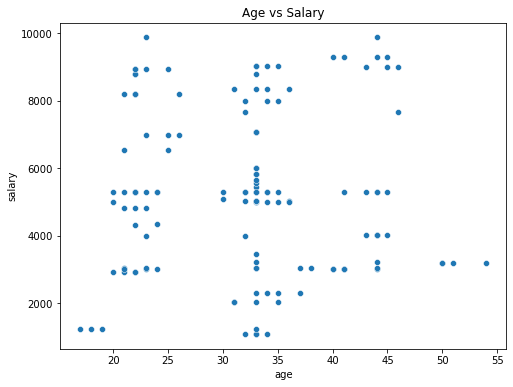

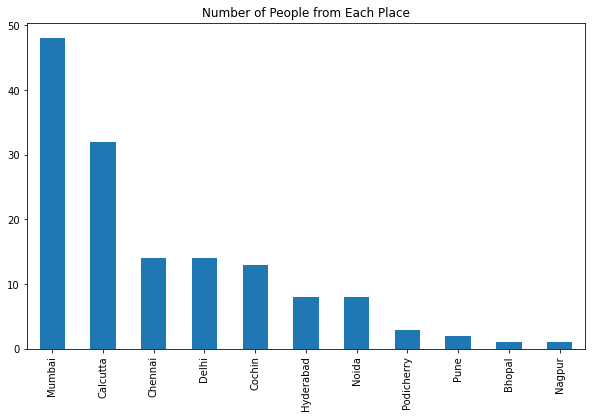

In [16]:
# Data Analysis

# Filter data with specific conditions
filtered_data = df[(df['age'] > 40) & (df['salary'] < 5000)]
print("Filtered Data:\n", filtered_data)

# Scatter plot for age vs salary
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='salary')
plt.title("Age vs Salary")
plt.show()

# Count people from each place and represent visually
place_counts = df['place'].value_counts()
place_counts.plot(kind='bar', figsize=(10, 6), title="Number of People from Each Place")
plt.show()


In [17]:
# Data Encoding

# Label Encoding for ordinal columns (example: Gender)
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])

# One-Hot Encoding for non-ordinal columns (example: Place)
from sklearn.preprocessing import OneHotEncoder
df = pd.get_dummies(df, columns=['place'], drop_first=True)


In [18]:
df

,company,age,salary,country,gender,place_Calcutta,place_Chennai,place_Cochin,place_Delhi,place_Hyderabad,place_Mumbai,place_Nagpur,place_Noida,place_Podicherry,place_Pune
0,TCS,20.0,5283.471074,India,0,0,1,0,0,0,0,0,0,0,0
1,Infosys,30.0,5283.471074,India,0,0,0,0,0,0,1,0,0,0,0
2,TCS,35.0,2300.000000,India,0,1,0,0,0,0,0,0,0,0,0
3,Infosys,40.0,3000.000000,India,0,0,0,0,1,0,0,0,0,0,0
4,TCS,23.0,4000.000000,India,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.000000,India,0,0,0,0,0,0,1,0,0,0,0
143,TCS,33.0,9024.000000,India,1,1,0,0,0,0,0,0,0,0,0
145,Infosys,44.0,4034.000000,India,1,0,0,0,1,0,0,0,0,0,0
146,TCS,33.0,5034.000000,India,1,0,0,0,0,0,1,0,0,0,0


In [19]:
# feature scaling

# Standard Scaling
scaler = StandardScaler()
df[['age', 'salary']] = scaler.fit_transform(df[['age', 'salary']])

df

,company,age,salary,country,gender,place_Calcutta,place_Chennai,place_Cochin,place_Delhi,place_Hyderabad,place_Mumbai,place_Nagpur,place_Noida,place_Podicherry,place_Pune
0,TCS,-1.484676,0.000000,India,0,0,1,0,0,0,0,0,0,0,0
1,Infosys,-0.267174,0.000000,India,0,0,0,0,0,0,1,0,0,0,0
2,TCS,0.341577,-1.264122,India,0,1,0,0,0,0,0,0,0,0,0
3,Infosys,0.950328,-0.967526,India,0,0,0,0,1,0,0,0,0,0,0
4,TCS,-1.119426,-0.543818,India,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Infosys Pvt Lmt,-1.241176,1.236606,India,0,0,0,0,0,0,1,0,0,0,0
143,TCS,0.098077,1.584894,India,1,1,0,0,0,0,0,0,0,0,0
145,Infosys,1.437329,-0.529412,India,1,0,0,0,1,0,0,0,0,0,0
146,TCS,0.098077,-0.105703,India,1,0,0,0,0,0,1,0,0,0,0


In [20]:
# Min-Max Scaling
minmax_scaler = MinMaxScaler()
df[['age', 'salary']] = minmax_scaler.fit_transform(df[['age', 'salary']])


In [21]:
df

,company,age,salary,country,gender,place_Calcutta,place_Chennai,place_Cochin,place_Delhi,place_Hyderabad,place_Mumbai,place_Nagpur,place_Noida,place_Podicherry,place_Pune
0,TCS,0.081081,0.477350,India,0,0,1,0,0,0,0,0,0,0,0
1,Infosys,0.351351,0.477350,India,0,0,0,0,0,0,1,0,0,0,0
2,TCS,0.486486,0.137817,India,0,1,0,0,0,0,0,0,0,0,0
3,Infosys,0.621622,0.217480,India,0,0,0,0,1,0,0,0,0,0,0
4,TCS,0.162162,0.331285,India,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Infosys Pvt Lmt,0.135135,0.809491,India,0,0,0,0,0,0,1,0,0,0,0
143,TCS,0.432432,0.903039,India,1,1,0,0,0,0,0,0,0,0,0
145,Infosys,0.729730,0.335154,India,1,0,0,0,1,0,0,0,0,0,0
146,TCS,0.432432,0.448959,India,1,0,0,0,0,0,1,0,0,0,0
